In [30]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
cancer_df = pd.read_excel('cancer_patient.xlsx')

In [3]:
cancer_df.shape

(1000, 25)

In [4]:
cancer_df.head().transpose()

,0,1,2,3,4
Patient Id,P1,P10,P100,P1000,P101
Age,33.0,17.0,35.0,37.0,46.0
Gender,1.0,1.0,1.0,1.0,1.0
Air Pollution,2.0,3.0,4.0,7.0,6.0
Alcohol use,4.0,1.0,5.0,7.0,8.0
Dust Allergy,5.0,5.0,6.0,7.0,7.0
OccuPational Hazards,4.0,3.0,5.0,7.0,7.0
Genetic Risk,3.0,4.0,5.0,6.0,7.0
chronic Lung Disease,2,2,4,7,6
Balanced Diet,2.0,2.0,6.0,7.0,7.0


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       997 non-null    float64
 2   Gender                    994 non-null    float64
 3   Air Pollution             991 non-null    float64
 4   Alcohol use               988 non-null    float64
 5   Dust Allergy              993 non-null    float64
 6   OccuPational Hazards      994 non-null    float64
 7   Genetic Risk              994 non-null    float64
 8   chronic Lung Disease      1000 non-null   int64  
 9   Balanced Diet             995 non-null    float64
 10  Obesity                   992 non-null    float64
 11  Smoking                   993 non-null    float64
 12  Passive Smoker            996 non-null    float64
 13  Chest Pain                992 non-null    float64
 14  Coughing 

In [6]:
cancer_df.isnull().sum().sort_values(ascending = False)

Coughing of Blood           13
Alcohol use                 12
Shortness of Breath         10
Air Pollution                9
Obesity                      8
Chest Pain                   8
Smoking                      7
Dust Allergy                 7
Swallowing Difficulty        7
Gender                       6
OccuPational Hazards         6
Genetic Risk                 6
Wheezing                     6
Fatigue                      5
Weight Loss                  5
Balanced Diet                5
Clubbing of Finger Nails     4
Passive Smoker               4
Age                          3
Frequent Cold                3
Dry Cough                    0
Snoring                      0
Patient Id                   0
chronic Lung Disease         0
Level                        0
dtype: int64

In [7]:
cancer_df.duplicated().sum()

0

In [8]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,997.0,37.185557,12.003960,14.0,28.00,36.0,45.0,73.0
Gender,994.0,1.400402,0.490227,1.0,1.00,1.0,2.0,2.0
Air Pollution,991.0,3.837538,2.032276,1.0,2.00,3.0,6.0,8.0
Alcohol use,988.0,4.577935,2.619582,1.0,2.00,5.0,7.0,8.0
Dust Allergy,993.0,5.225579,2.767079,1.0,4.00,6.0,7.0,66.0
OccuPational Hazards,994.0,4.837022,2.107293,1.0,3.00,5.0,7.0,8.0
Genetic Risk,994.0,4.583501,2.125842,1.0,2.25,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380000,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,995.0,5.184925,22.152435,1.0,2.00,4.0,7.0,700.0
Obesity,992.0,4.476815,2.127962,1.0,3.00,4.0,7.0,7.0


### Data Description
The features of these dataset are Patient Id, Gender, and 23 syptoms of cancer patients rated from 1 to 10. With 1 being less severe and 10 being more severe. As well as the last column indicating the level of cancer.

### Data Assesment
The following data quality and tidiness issues were discovered:

__Missing data__(can I use the mean/mode to replace the value?)

There 123 missing data stored as 'nan'

Coughing of Blood           13
Alcohol use                 12
Shortness of Breath         10
Air Pollution                9
Obesity                      8
Chest Pain                   8
Smoking                      7
Dust Allergy                 7
Swallowing Difficulty        7
Gender                       6
OccuPational Hazards         6
Genetic Risk                 6
Wheezing                     6
Fatigue                      5
Weight Loss                  5
Balanced Diet                5
Clubbing of Finger Nails     4
Passive Smoker               4
Age                          3
Frequent Cold                3

__Messy data (Structural issues)__
- Column headings have spaces
- Gender column has Male stored as 1 and Female stored as 2

__Invalid data__ (can I a scatter plot/box plots to detect outliers)
- Dust Allergy has a level of 66
- Balanced Diet has a rating of 700
- Weight Loss has a rating of 20
- Passive Smoker has a rating 222
- Wheesing has a rating of 11
- Fatigue has a rating of 222

In [9]:
print(cancer_df['Age'].unique())
print(cancer_df['Frequent Cold'].unique())
print(cancer_df['Genetic Risk'].unique())

[33. 17. 35. 37. 46. 52. 28. 44. 64. 39. 34. 27. 73. nan 36. 14. 24. 53.
 62. 29. 65. 19. 42. 32. 25. 45. 26. 48. 22. 38. 18. 23. 47. 61. 55. 31.
 49. 43. 51. 54. 63.]
[ 2.  1.  6.  4.  3. nan  7.  5.]
[ 3.  4.  5.  6.  7.  2. nan  1.]


In [10]:
# copy dataframe before cleaning
cancer_df_clean = cancer_df.copy()

In [11]:
# Replace 1 with male and 2 with female in the Gender column
cancer_df_clean['Gender'] = cancer_df_clean['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [12]:
cancer_df_clean.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33.0,Male,2.0,4.0,5.0,4.0,3.0,2,2.0,...,3.0,4.0,2.0,2.0,3.0,1.0,2.0,3,4,Low
1,P10,17.0,Male,3.0,1.0,5.0,3.0,4.0,2,2.0,...,1.0,3.0,7.0,8.0,6.0,2.0,1.0,7,2,Medium
2,P100,35.0,Male,4.0,5.0,6.0,5.0,5.0,4,6.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7,2,High
3,P1000,37.0,Male,7.0,7.0,7.0,7.0,6.0,7,7.0,...,4.0,2.0,3.0,1.0,4.0,5.0,6.0,7,5,High
4,P101,46.0,Male,6.0,8.0,7.0,7.0,7.0,6,7.0,...,3.0,NaN,4.0,1.0,4.0,2.0,4.0,2,3,High


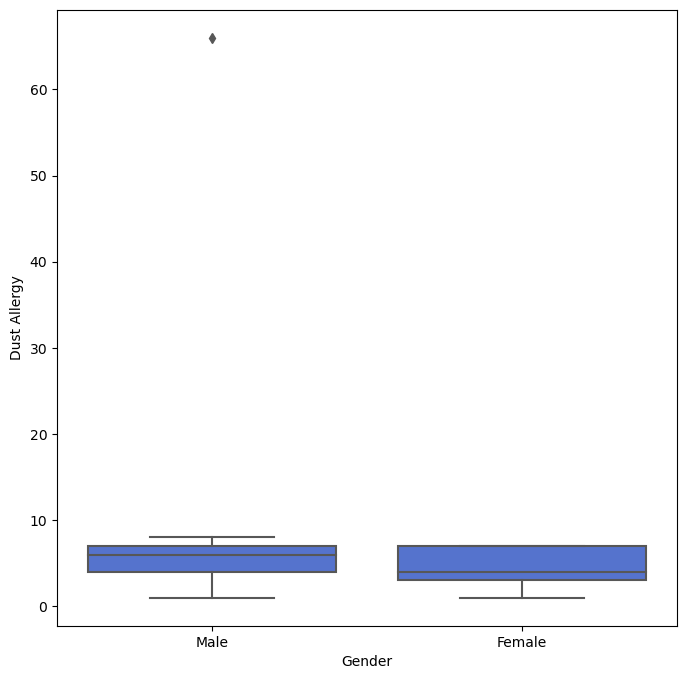

In [13]:
plt.figure(figsize = [8,8])
sb.boxplot(data = cancer_df_clean, x ='Gender' , y = 'Dust Allergy', color = 'royalblue');
#plt.title('Loan Term and APR', fontsize=16);

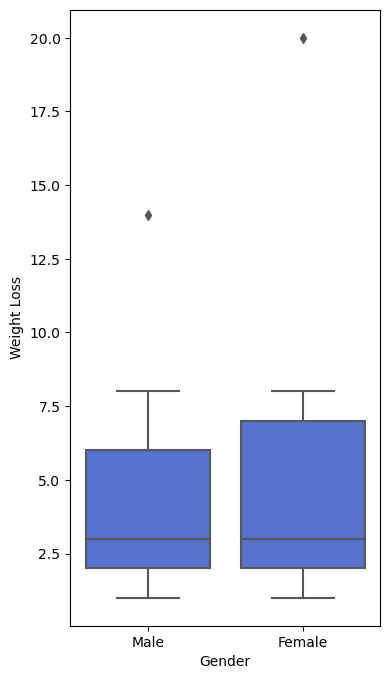

In [14]:
plt.figure(figsize = [4,8])
sb.boxplot(data = cancer_df_clean, x ='Gender' , y = 'Weight Loss', color = 'royalblue');
#plt.title('Loan Term and APR', fontsize=16);

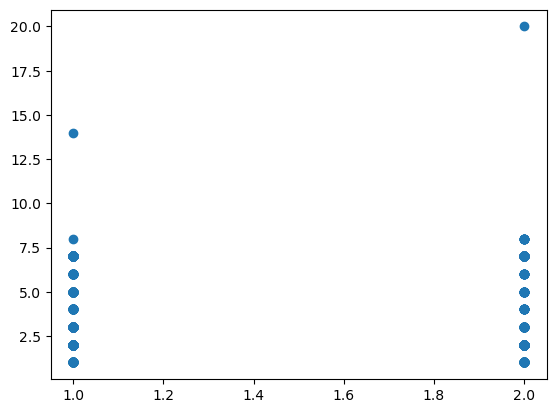

In [15]:
plt.scatter(x = cancer_df['Gender'], y = cancer_df['Weight Loss'])

## Check the normality of the data

### Distribution of cancer level

In [22]:
cancer_df_clean1 = cancer_df_clean.filter(['Weight Loss','Fatigue'])

<Figure size 1800x1000 with 0 Axes>

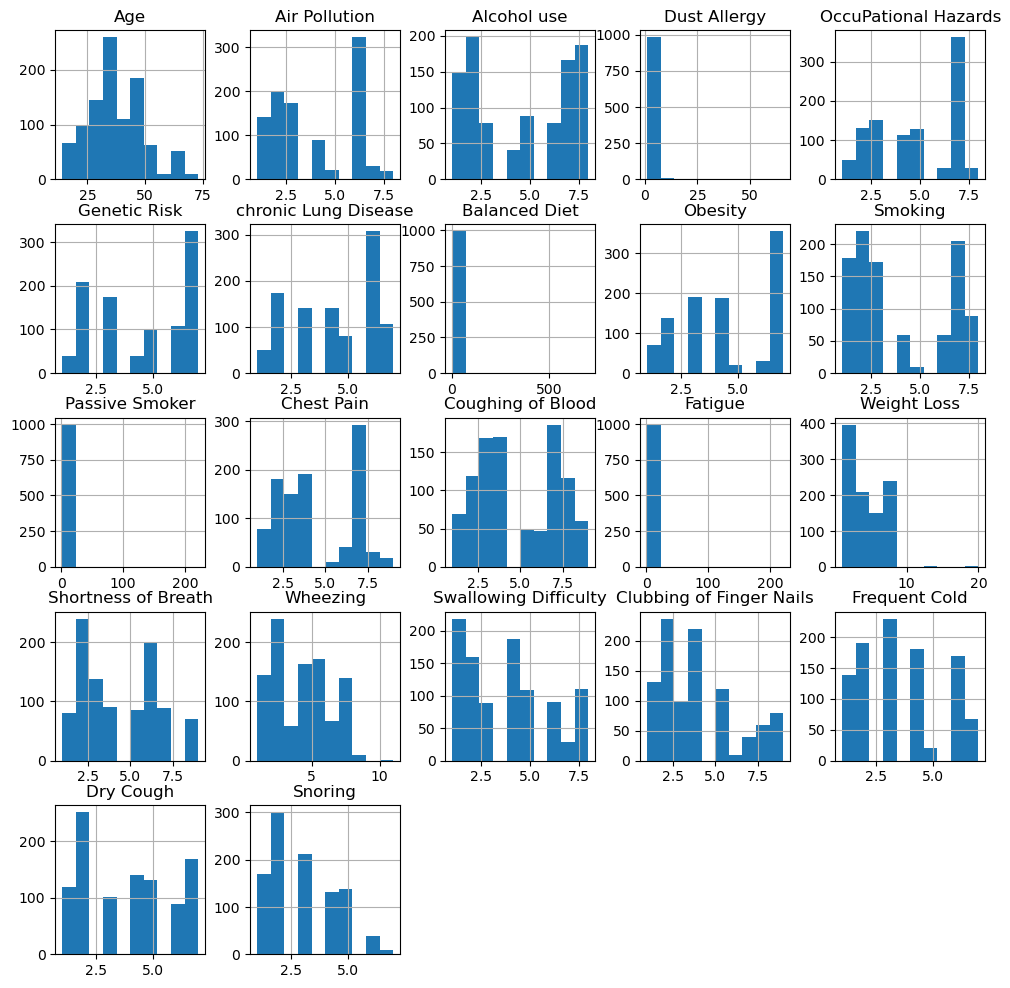

In [29]:
plt.figure(figsize=[18, 10])
cancer_df_clean.hist(figsize=[12, 12]);

In [32]:
cancer_df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,997.0,37.185557,12.003960,14.0,28.00,36.0,45.0,73.0
Air Pollution,991.0,3.837538,2.032276,1.0,2.00,3.0,6.0,8.0
Alcohol use,988.0,4.577935,2.619582,1.0,2.00,5.0,7.0,8.0
Dust Allergy,993.0,5.225579,2.767079,1.0,4.00,6.0,7.0,66.0
OccuPational Hazards,994.0,4.837022,2.107293,1.0,3.00,5.0,7.0,8.0
Genetic Risk,994.0,4.583501,2.125842,1.0,2.25,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380000,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,995.0,5.184925,22.152435,1.0,2.00,4.0,7.0,700.0
Obesity,992.0,4.476815,2.127962,1.0,3.00,4.0,7.0,7.0
Smoking,993.0,3.949648,2.495052,1.0,2.00,3.0,7.0,8.0


From the shape of the histogram and the desdriptive statistics we see that the Feature that is normally distributed is Age.

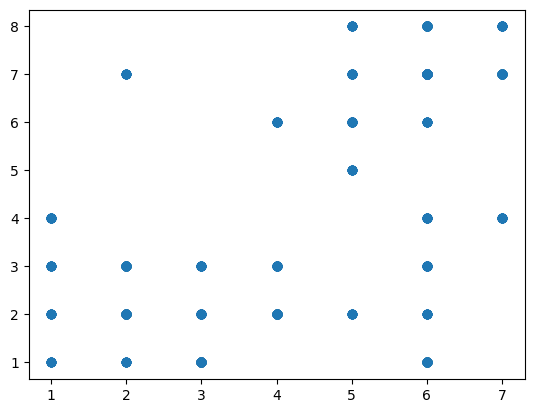

In [37]:
plt.scatter(x = cancer_df_clean['chronic Lung Disease'], y = cancer_df_clean['Smoking'])

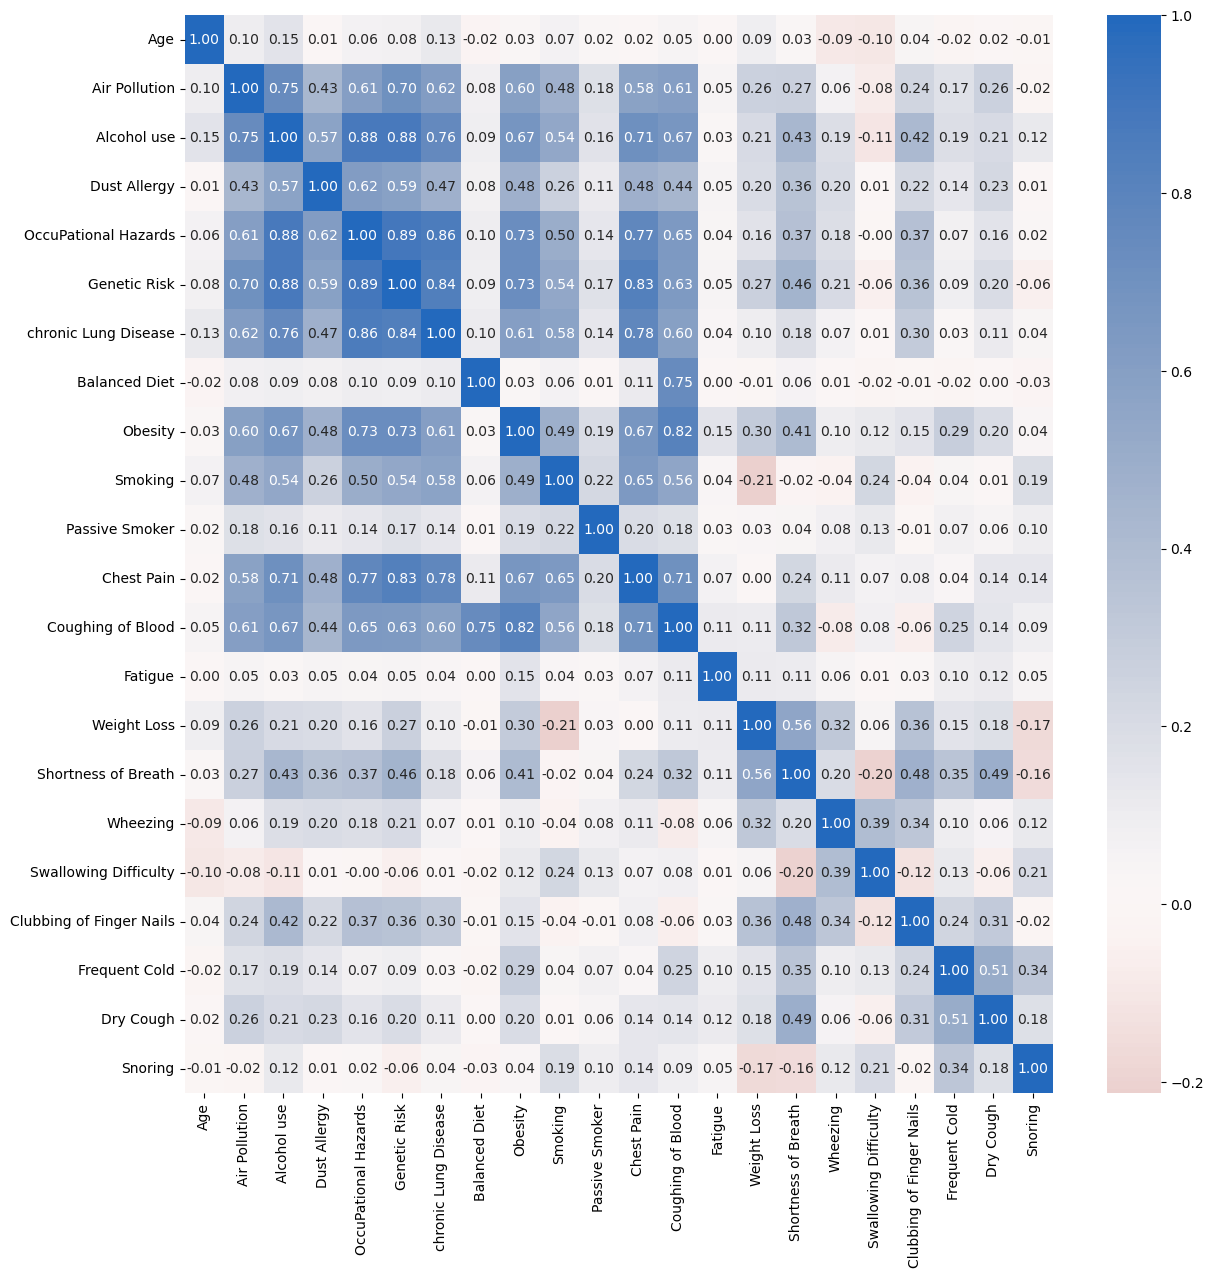

In [36]:
plt.figure(figsize=[14, 14])
sb.heatmap(cancer_df_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()